# CPI Optimization

## Goal

** max. $f = 0.70 * CTR_normalized + 0.15 * TopRecs + 0.15 * DistinctRecs$ **

- f is normalized, i.e. theoretical optimum = 1
- All evaluations are performed with **topK=3**

- x: CPI score (with alpha) = proximity^-alpha for recommendation pair
- y: number of in links of recommended article
- z: total number article in test collection

- CTR_normalized
    - CTR: clicks on all recommended articles
    - CTR_normalized = CTR / top-k clicked articles | best score = 1
- TopRecs: how often is the most recommended article recommended (measure of coverage)
    - Optimum value: 1 | most recommended article is only one time recommended
    - $TopRecs = 1/count$
- DistinctRecs: (measure of coverage)

## Proximity

- Words – Number of words between two links
- Relative words – Number of words between two links divided by the total number of words the linking article contains
- Structure – Distance based on text structure elements (sentence ½, paragraph ¼, subsection 1/8, section 1/16, article 1/20)

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

from tabulate import tabulate
import pandas as pd


In [3]:
# Load CPI values (simplewiki)
# cpis = np.loadtxt('cpi_sample_0_1', delimiter='\n')  # 10% sample - 270MB
cpis = np.loadtxt('cpi_sample_0_01', delimiter='\n')  # 1% sample - 27MB

cpis_log = np.log(cpis)

In [4]:
print('1st element: %f' % cpis[0])
print('Mean: %f\nMin: %f\nMax: %f\nCount: %i' % (np.mean(cpis), np.min(cpis), np.max(cpis), len(cpis)))


1st element: 0.017200
Mean: 0.021607
Min: 0.000100
Max: 1032.410400
Count: 4135774


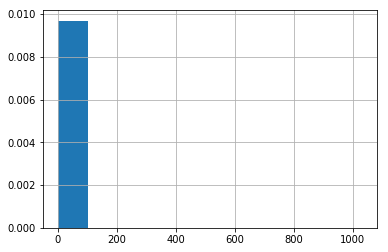

In [3]:

n, bins, patches = plt.hist(cpis, 10, normed=True)

#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

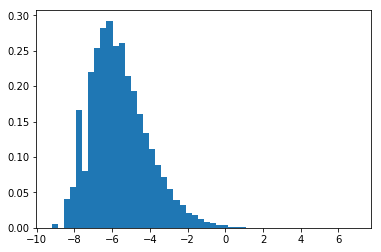

In [5]:
plt.hist(cpis_log, 50, normed=True)
plt.show()

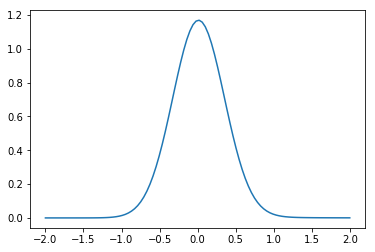

In [18]:
density = gaussian_kde(cpis)
xs = np.linspace(-2,2,100)
#density.covariance_factor = lambda : .5
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

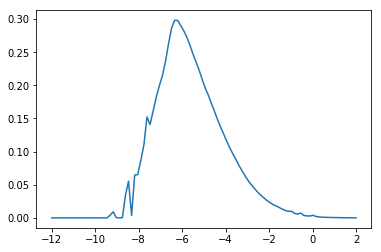

In [9]:
density = gaussian_kde(cpis_log)
xs = np.linspace(-12,2,100)
#density.covariance_factor = lambda : .5
#density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

In [40]:
# Load article stats
# Columns:  * Name * Words * Headlines * OutLinks * AvgLinkDistance * InLinks
stats_cols = ('name', 'words', 'headlines', 'outlinks', 'avg_link_distance', 'inlinks')
with open('simplewiki_stats', 'rb') as f:
    stats = np.loadtxt(f, delimiter='|', 
                   dtype={
                       'names': stats_cols,  
                       'formats': ('unicode', 'int', 'int', 'int', 'float', 'int')
                   })



### words
Mean: 337.331728
Min: 1.000000
Max: 39452.000000
Count: 122076

### headlines
Mean: 2.106966
Min: 0.000000
Max: 214.000000
Count: 122076

### outlinks
Mean: 24.460385
Min: 0.000000
Max: 5469.000000
Count: 122076

### avg_link_distance
Mean: nan
Min: nan
Max: nan
Count: 122076

### inlinks
Mean: 12.184262
Min: 0.000000
Max: 12657.000000
Count: 122076


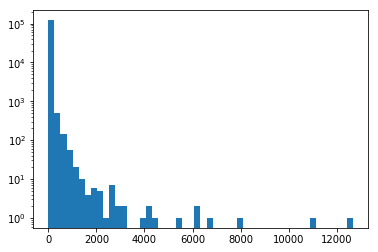

In [45]:

for col in stats_cols:
    if col == 'name':
        continue
    
    s = stats[col]
    print('\n### %s' % col)
    print('Mean: %f\nMin: %f\nMax: %f\nCount: %i' % (np.mean(s), np.min(s), np.max(s), len(s)))
    

plt.hist(stats['inlinks'], 50, log=True)
plt.show()

In [46]:
# Include output for each Flink run here

runs = [
    {
    "equation": "x",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232514634,
    "top_k_clicks": 21091599,
    "opt_clicks": 111060170,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 921,
    "distinct_rec_count": 91032
  },
  {
    "equation": "x*log(z/(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 235085870,
    "top_k_clicks": 26708916,
    "opt_clicks": 113256642,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 884,
    "distinct_rec_count": 67623
  },
  {
    "equation": "x*log((z-y)/(y+1))",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232987482,
    "top_k_clicks": 26646898,
    "opt_clicks": 111615184,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 884,
    "distinct_rec_count": 67640
  },
  {
    "equation": "(1+log(x))*log(z/(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233412503,
    "top_k_clicks": 24075166,
    "opt_clicks": 112140343,
    "article_count": 87958,
    "top_rec_title": "2014",
    "top_rec_count": 889,
    "distinct_rec_count": 103916
  },
  {
    "equation": "(1+log(x))/sqrt(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 234303821,
    "top_k_clicks": 5479381,
    "opt_clicks": 112799793,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 471,
    "distinct_rec_count": 145594
  },
  {
    "equation": "x/sqrt(y+1)",
    "proximity": "words",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233322353,
    "top_k_clicks": 9892236,
    "opt_clicks": 111789665,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 423,
    "distinct_rec_count": 154995
  },
  {
    "equation": "x/sqrt(y+1)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233033256,
    "top_k_clicks": 7541501,
    "opt_clicks": 111733256,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 479,
    "distinct_rec_count": 152798
  },
  {
    "equation": "x",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232933071,
    "top_k_clicks": 17039137,
    "opt_clicks": 111413126,
    "article_count": 87958,
    "top_rec_title": "Americans",
    "top_rec_count": 1165,
    "distinct_rec_count": 95450
  },
  {
    "equation": "(1+log(x))/sqrt(y+1)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233067901,
    "top_k_clicks": 399003,
    "opt_clicks": 111730040,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 536,
    "distinct_rec_count": 135850
  },
  {
    "equation": "x/log(y+2)",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 232366764,
    "top_k_clicks": 11586104,
    "opt_clicks": 111222858,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 366,
    "distinct_rec_count": 143645
  },
  {
    "equation": "x/(1+log(y+1))",
    "proximity": "relative",
    "alpha": 0,
    "recs_count": 263457,
    "impressions": 1386875333,
    "total_clicks": 233926433,
    "top_k_clicks": 9101762,
    "opt_clicks": 112385308,
    "article_count": 87958,
    "top_rec_title": "Prime Minister",
    "top_rec_count": 417,
    "distinct_rec_count": 144301
  }
]


In [50]:

# Print runs
# ALTERNATIVE: Convert to LaTeX
# https://techoverflow.net/2013/12/08/converting-a-pandas-dataframe-to-a-customized-latex-tabular/

df = pd.DataFrame(runs)

# Compute CTR
df['ctr'] = df.apply(lambda r: r['top_k_clicks'] / r['opt_clicks'], axis=1)

# Compute goal function
df['f'] = df.apply(lambda r: 0.7 * r['ctr'] + 0.15 * (1/r['top_rec_count']) + 0.15 * (r['distinct_rec_count']/r['article_count']), axis=1)

# Find best run
df['f_max'] = df.apply(lambda r: r['f'] == np.max(df['f']), axis=1)

print(tabulate(df[['equation','proximity','top_k_clicks','ctr','top_rec_count', 'distinct_rec_count', 'f_max']], headers='keys'))

    equation                proximity      top_k_clicks         ctr    top_rec_count    distinct_rec_count  f_max
--  ----------------------  -----------  --------------  ----------  ---------------  --------------------  -------
 0  x                       words              21091599  0.189911                921                 91032  False
 1  x*log(z/(y+1)           words              26708916  0.235826                884                 67623  False
 2  x*log((z-y)/(y+1))      words              26646898  0.238739                884                 67640  False
 3  (1+log(x))*log(z/(y+1)  words              24075166  0.214688                889                103916  True
 4  (1+log(x))/sqrt(y+1)    words               5479381  0.0485762               471                145594  False
 5  x/sqrt(y+1)             words               9892236  0.0884897               423                154995  False
 6  x/sqrt(y+1)             relative            7541501  0.0674956               479   

## Flink Jobs

Use the following commands to generate clickstream evaluation output (with simplewiki):

```
export RUN="00"

# With CPI expression + top recommendations
$FLINK_HOME/bin/flink run -c org.wikipedia.citolytics.clickstream.ClickStreamEvaluation -p $PARALLELISM $JAR \
    --wikisim $OUTPUT_DIR/wikisim_raw \
    --gold $CLICKSTREAMS_PATH \
    --topk 3 \
    --id-title-mapping $ENWIKI_IDTITLE_MAPPING \
    --langlinks $ENWIKI_LANGLINKS \
    --lang simple \
    --summary \
    --top-recommendations $OUTPUT_DIR/top_$RUN \
    --output $OUTPUT_DIR/cs_cpi_$RUN

# See cpi_optimization.sh for all job parameters
    
```

Extract Flink output and rewrite to Python array:

```

hdfs dfs -cat $OUTPUT_DIR/cs_cpi_$RUN | awk -F'|' '{print "{\"equation\": \"\", \"proximity\": \"\", \"alpha\": 0, \"recs_count\": "$3", \"impressions\": "$4", \"total_clicks\": "$5", \"top_k_clicks\": "$6", \"opt_clicks\": "$9""}'

hdfs dfs -cat $OUTPUT_DIR/top_$RUN | sed ':a;N;$!ba;s/\n/|/g' | awk -F'|' '{print ", \"article_count\": "$2", \"top_rec_title\":\""$3"\", \"top_rec_count\": "$4", \"distinct_rec_count\":"$6"}"}'
```

#### Runtimes

- Simplewiki + Langlinks + Without CPI expression (stats): 2 min

## Gold standard: ClickStreams

The following data sets are used for the evaluation. A download is available at [datahub.io](https://datahub.io/dataset/wikipedia-clickstream).

- 2015_02_en_clickstream.tsv
- 2016_02_en_clickstream.tsv
- 2016_03_en_clickstream.tsv
- 2016_04_en_clickstream.tsv
- 2016_08_en_clickstream.tsv
- 2016_09_en_clickstream.tsv
- 2017_01_en_clickstream.tsv
